<a href="https://colab.research.google.com/github/namphuong20146470/namphuong20146470/blob/main/CNN_10loai_mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#10 loại mó ăn
import numpy as np
from keras_preprocessing import image
import cv2
import os
import tensorflow as tf
import time
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [18]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/test4',
                                                 target_size = (64, 64),
                                                 batch_size = 12,
                                                 class_mode = 'categorical')

Found 10 images belonging to 6 classes.


In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/train4',
                                            target_size = (64, 64),
                                            batch_size = 12,
                                            class_mode = 'categorical')

Found 10 images belonging to 6 classes.


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

# lớp CNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# lớp CNN3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  


 
  
# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten()) 
# lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
# lớp output
model.add(Dense(10, activation=tf.nn.softmax)) # 4 đầu ra 

In [22]:
classes = ['10000vnd','1000vnd','2000vnd','5000vnd','500vnd','100000vnd','100','20000vnd','200vnd','50000']
print("Image Processing.......Compleated")

Image Processing.......Compleated


In [23]:
cnn = tf.keras.models.Sequential()
print("Building Neural Network.....")
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print("Training cnn")
cnn.fit(x = training_set, validation_data = test_set, epochs = 100,verbose=1)
cnn.save("model11.h5")

Building Neural Network.....
Training cnn
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.7865 - accuracy: 0.2000 - val_loss: 1.7469 - val_accuracy: 0.2000
Epoch 2/100
1/1 [==============================] - 0s 188ms/step - loss: 1.7449 - accuracy: 0.2000 - val_loss: 1.6942 - val_accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 0s 187ms/step - loss: 1.6868 - accuracy: 0.2000 - val_loss: 1.6560 - val_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 191ms/step - loss: 1.6417 - accuracy: 0.4000 - val_loss: 1.6191 - val_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 0s 204ms/step - loss: 1.6108 - accuracy: 0.2000 - val_loss: 1.6372 - val_accuracy: 0.2000
Epoch 6/100
1/1 [==============================] - 0s 186ms/step - loss: 1.6210 - accuracy: 0.2000 - val_loss: 1.6134 - val_accuracy: 0.2000
Epoch 7/100
1/1 [==============================] - 0s 256ms/step - loss: 1.5964 - accuracy: 0.2000 - val_loss: 1.62

Saving download (11).jpg to download (11).jpg
[[1.0000000e+00 2.3960486e-38 1.4996754e-11 2.3280168e-37 1.6170245e-36
  1.7494112e-32 2.6969743e-22 0.0000000e+00 0.0000000e+00 2.3678870e-18]]
Giá trị dự đoán:  10000vnd


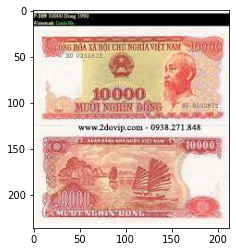

In [32]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10000)
  print(y_predict)
  print('Giá trị dự đoán: ', classes[np.argmax(y_predict)])